In [37]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
eji = gpd.read_file("data/EJI_2024_CA/eji.gdb")

eaton = gpd.read_file("data/eaton/Eaton_Perimeter_20250121.shp")
palisades = gpd.read_file("data/palisades/Palisades_Perimeter_20250121.shp")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [3]:
#assert eji.crs == eaton.crs

In [4]:
eji = eji.to_crs(palisades.crs)

In [5]:
eji.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
palisades.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
type(eji)

geopandas.geodataframe.GeoDataFrame

In [8]:
type(palisades)

geopandas.geodataframe.GeoDataFrame

<Axes: >

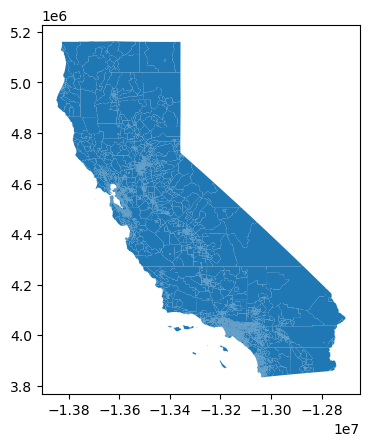

In [8]:
eji_pali = gpd.sjoin(eji, palisades, predicate = 'intersects')

<Axes: >

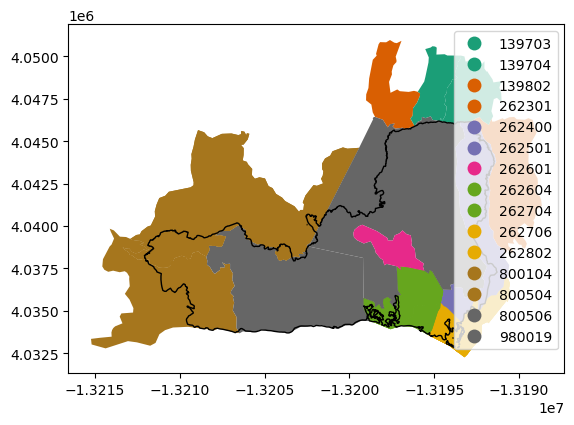

In [23]:
fig, ax = plt.subplots()
    
eji_pali.plot(ax = ax,
                column = 'TRACTCE',
                cmap = 'Dark2',
                legend = True)
    
palisades.plot(ax = ax,
               color = 'none')

In [27]:
eji_eat = gpd.sjoin(eji, eaton, predicate = 'intersects')

<Axes: >

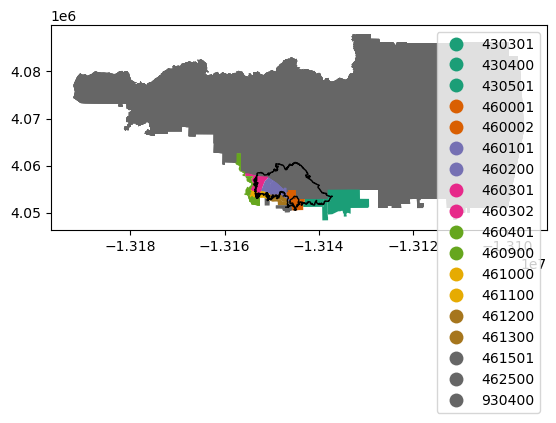

In [26]:
fig, ax = plt.subplots()
    
eji_eat.plot(ax = ax,
                column = 'TRACTCE',
                cmap = 'Dark2',
                legend = True)
    
eaton.plot(ax = ax,
               color = 'none')

In [35]:
palisades_clip = gpd.clip(eji_pali, palisades)
eaton_clip = gpd.clip(eji_eat, eaton)

<Axes: >

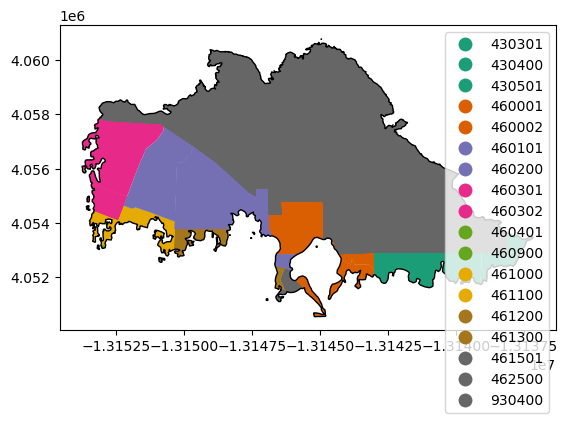

In [36]:
fig, ax = plt.subplots()
    
eaton_clip.plot(ax = ax,
                column = 'TRACTCE',
                cmap = 'Dark2',
                legend = True)
    
eaton.plot(ax = ax,
               color = 'none')

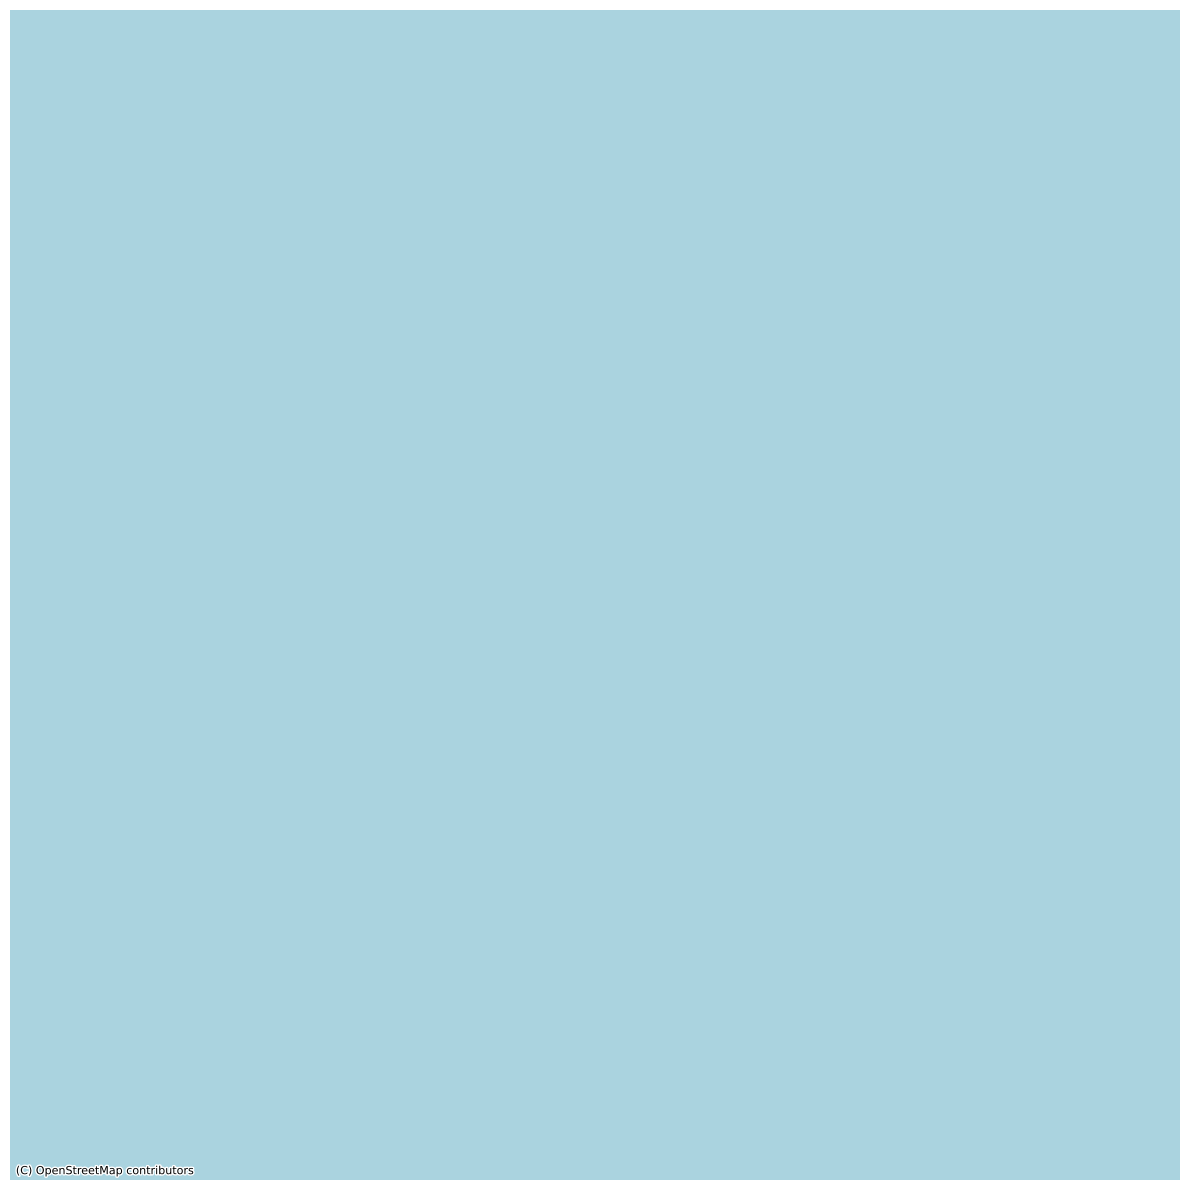

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
eaton.plot(ax = ax,
               color = 'none')

# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE

# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()

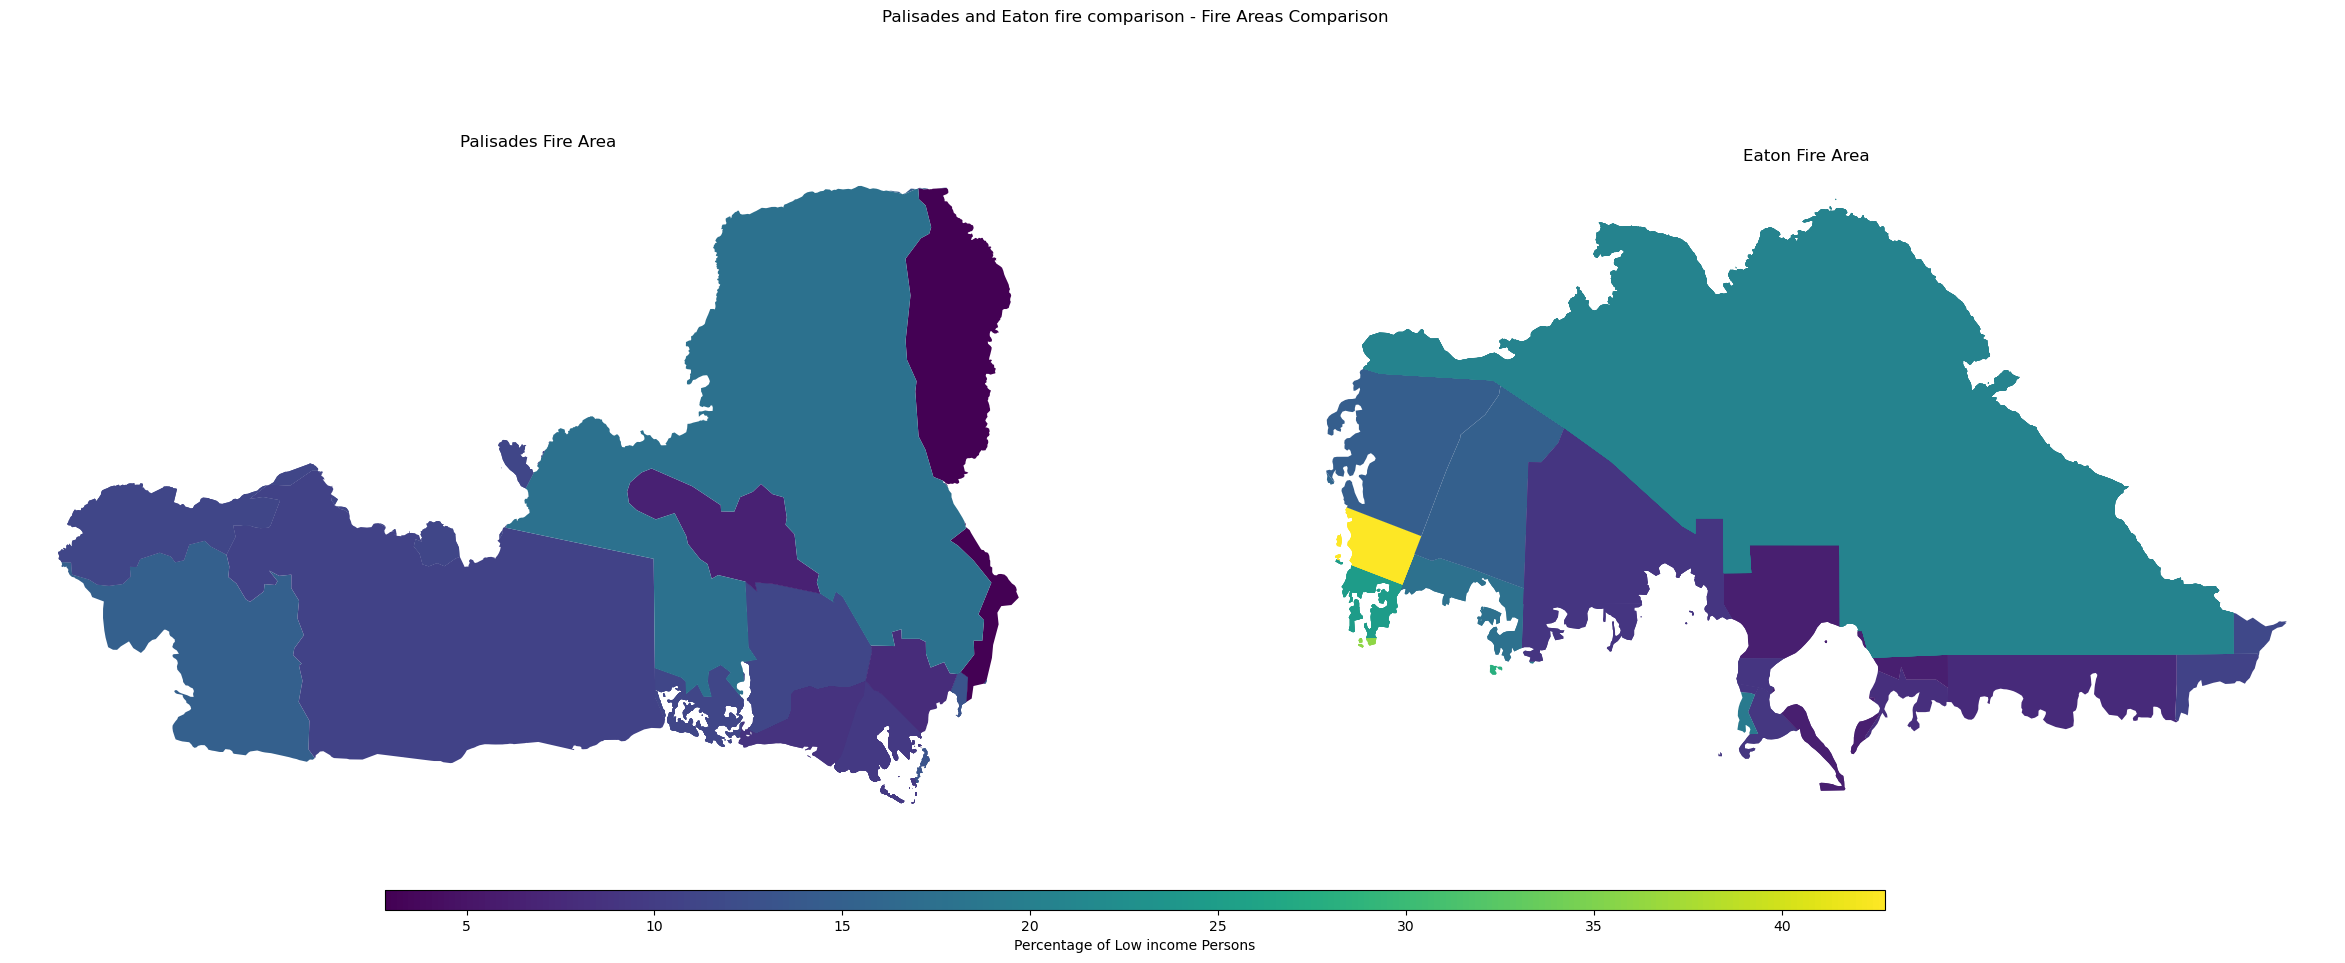

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'E_POV200' # percentage of persons with income below 200% of federal poverty level
census_within_palisades = palisades_clip
census_within_eaton = eaton_clip

# Find common min/max for legend range
vmin = min(census_within_palisades[eji_variable].min(), census_within_eaton[eji_variable].min())
vmax = max(census_within_palisades[eji_variable].max(), census_within_eaton[eji_variable].max())

# Plot census tracts within Palisades perimeter
census_within_palisades.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades Fire Area')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
census_within_eaton.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Fire Area')
ax2.axis('off')

# Add overall title
fig.suptitle('Palisades and Eaton fire comparison - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Percentage of Low income Persons')

plt.show()